0.95
Early stopping at epoch 116


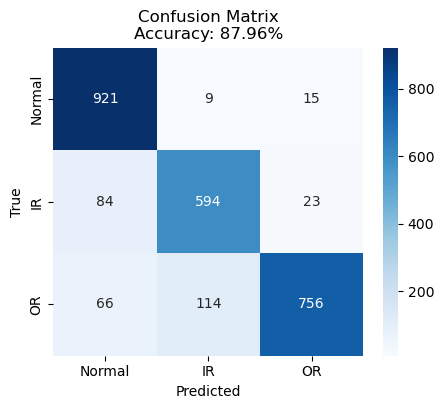

 - Model accuracy: 87.96%


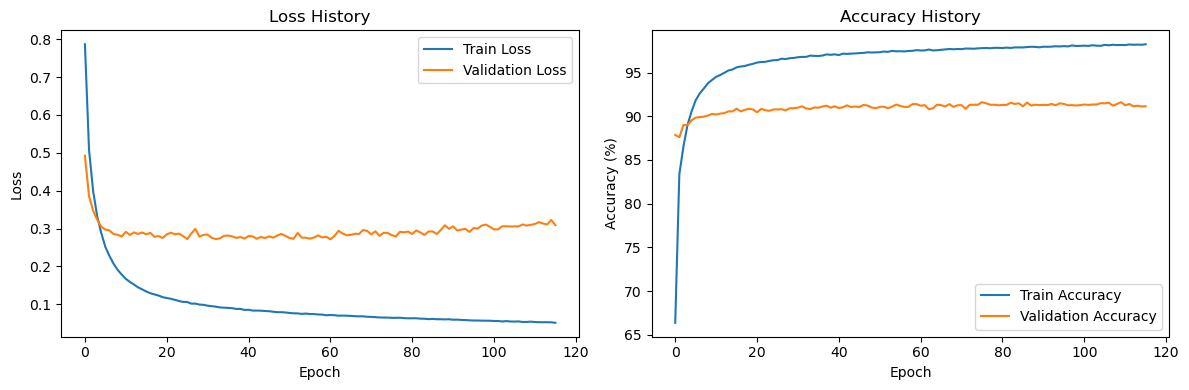

0.95
Early stopping at epoch 137


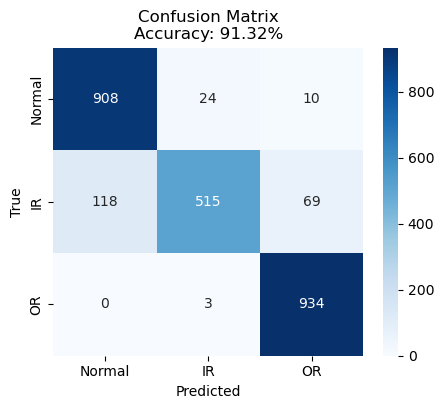

 - Model accuracy: 91.32%


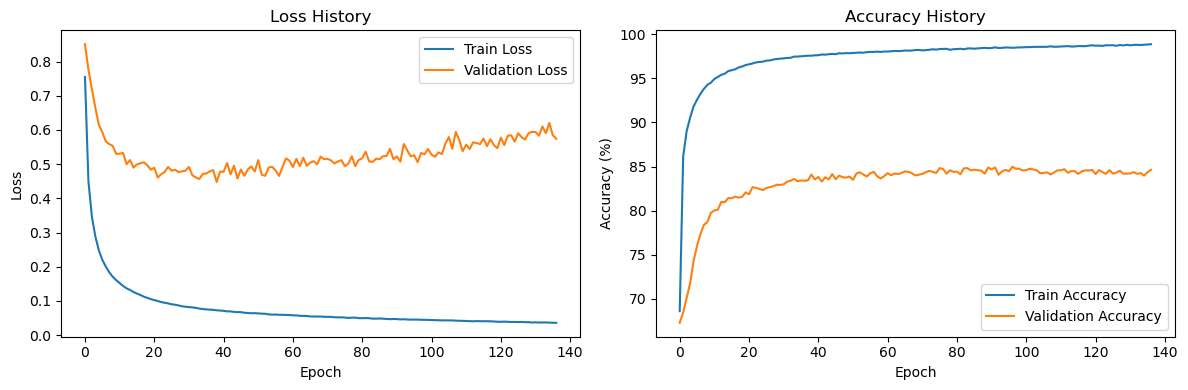

0.95
Early stopping at epoch 156


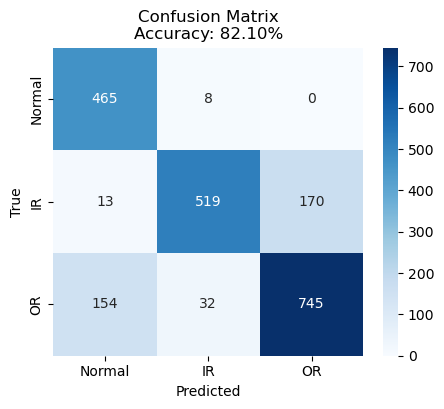

 - Model accuracy: 82.10%


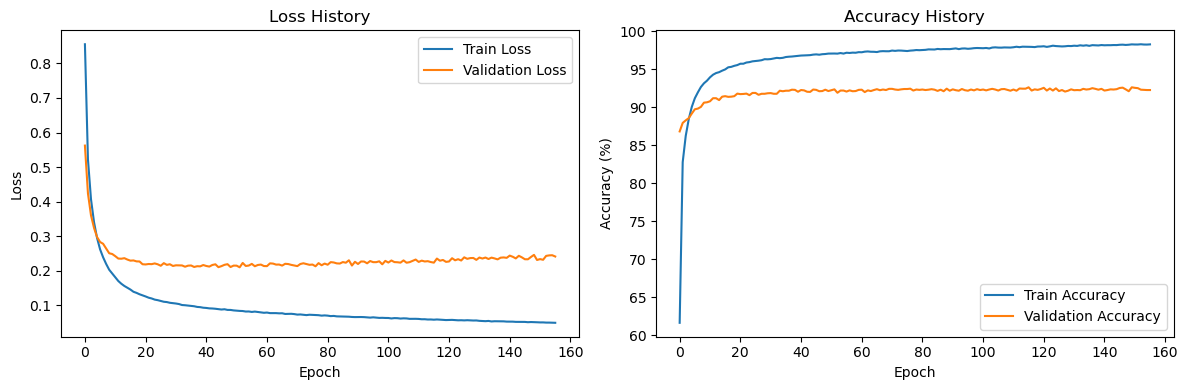

0.95
Early stopping at epoch 86


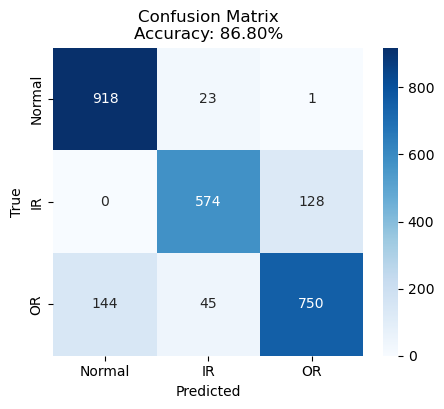

 - Model accuracy: 86.80%


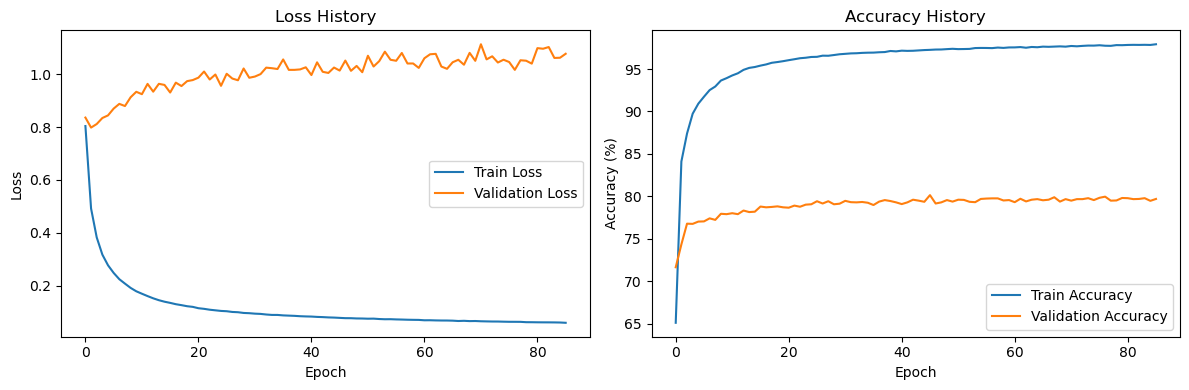

0.95
Early stopping at epoch 79


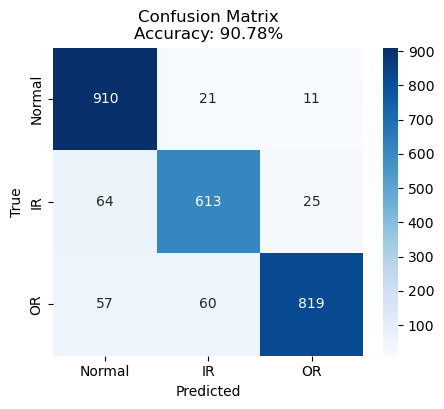

 - Model accuracy: 90.78%


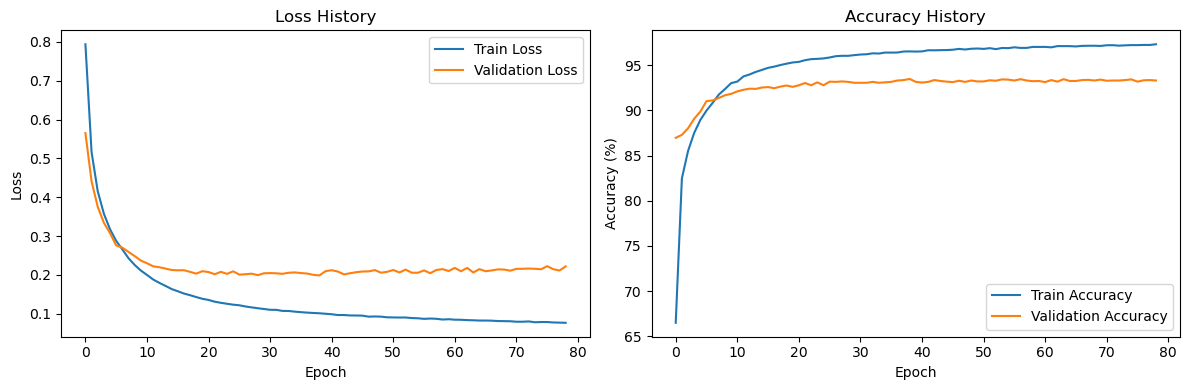

0.95
Early stopping at epoch 126


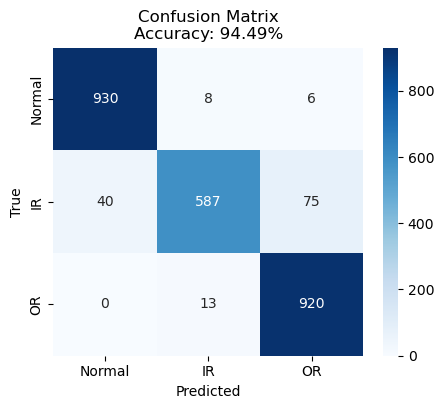

 - Model accuracy: 94.49%


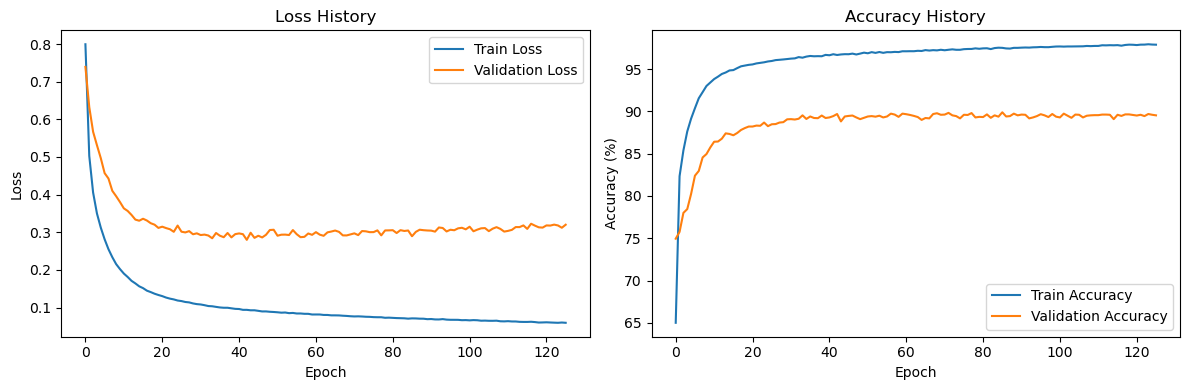

0.95
Early stopping at epoch 284


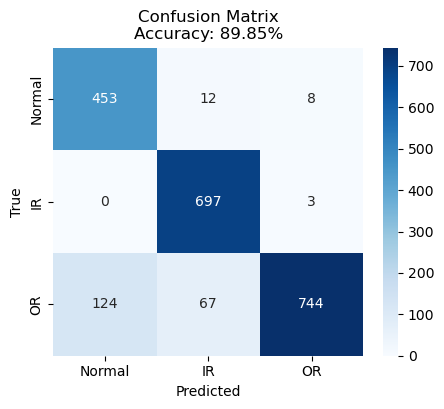

 - Model accuracy: 89.85%


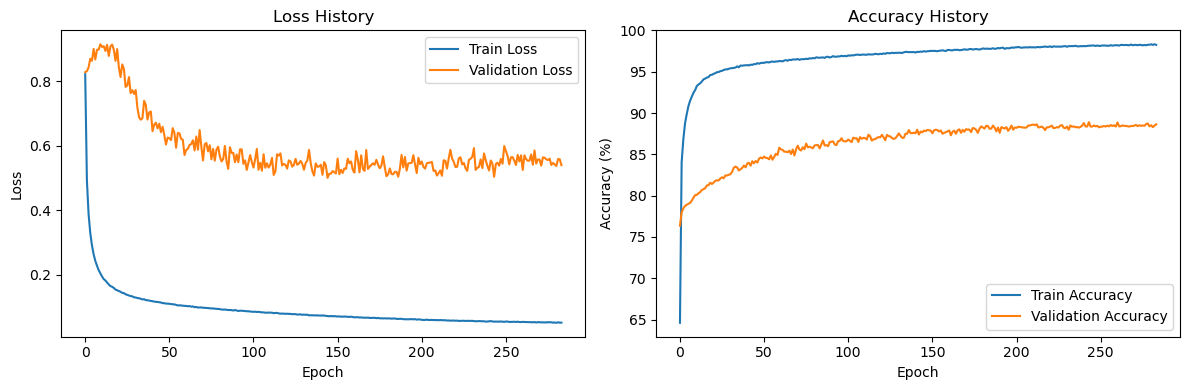

0.95
Early stopping at epoch 132


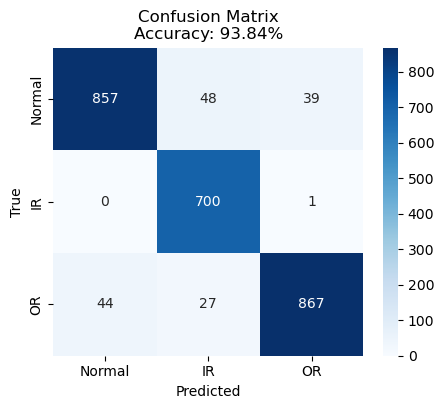

 - Model accuracy: 93.84%


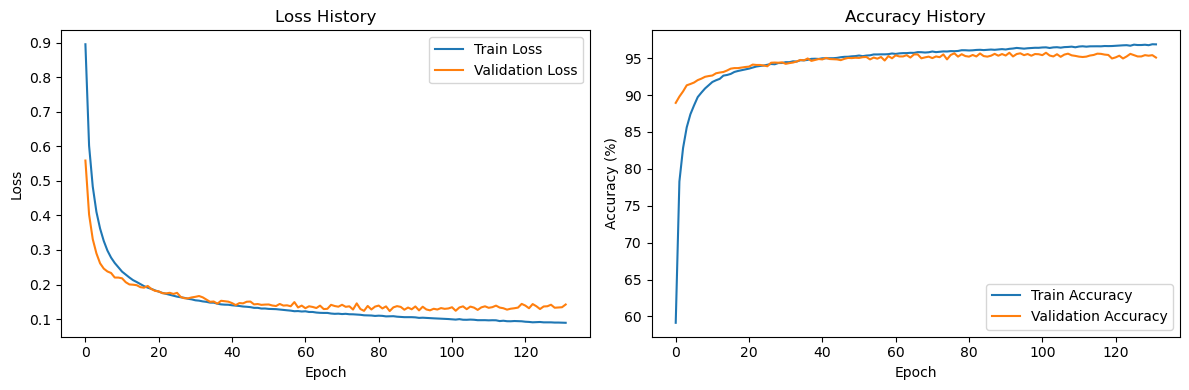

0.95
Early stopping at epoch 160


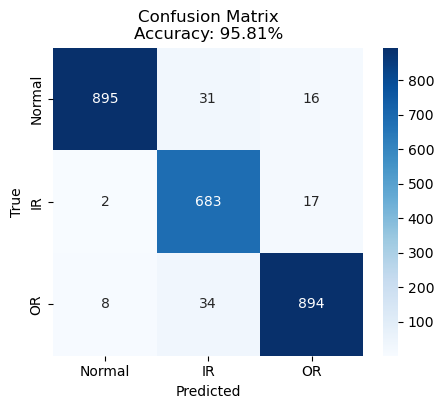

 - Model accuracy: 95.81%


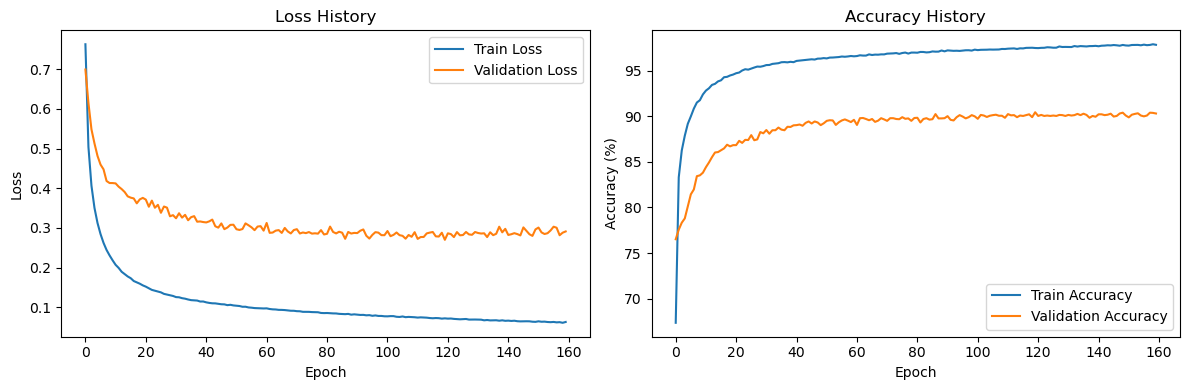

0.95
Early stopping at epoch 109


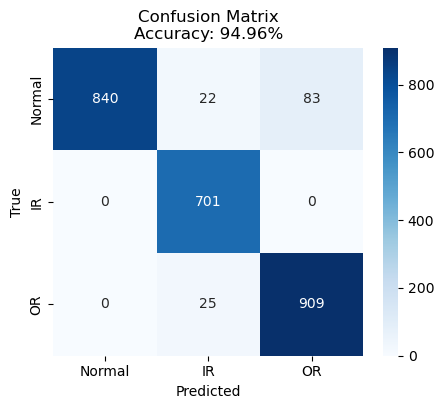

 - Model accuracy: 94.96%


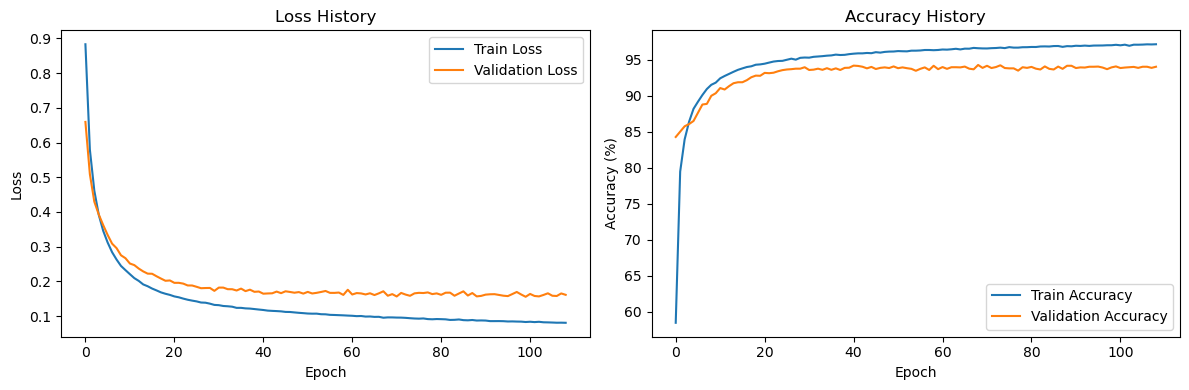

0.95
Early stopping at epoch 134


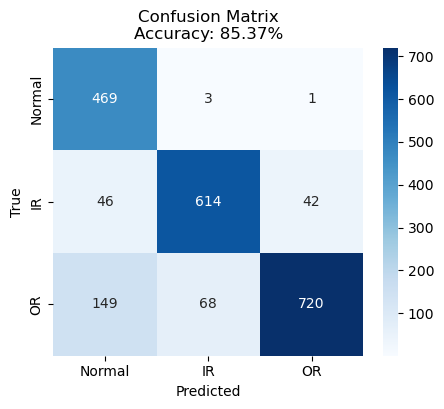

 - Model accuracy: 85.37%


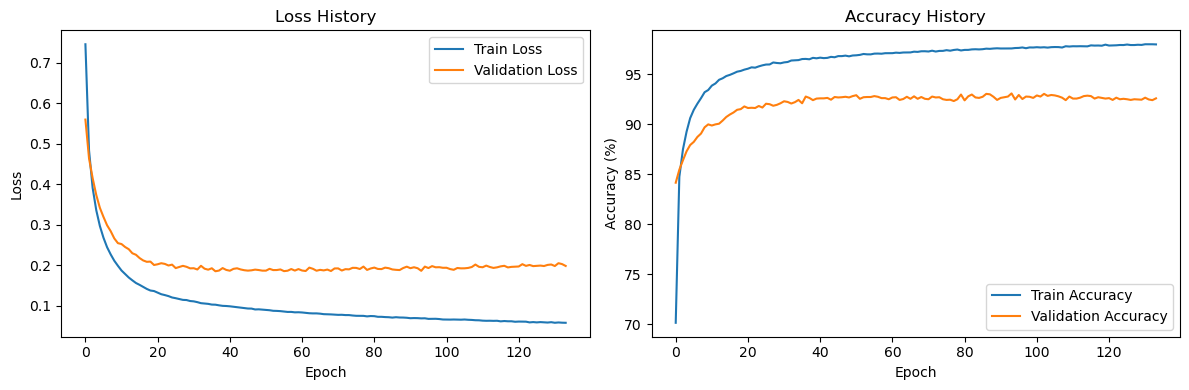

0.95
Early stopping at epoch 81


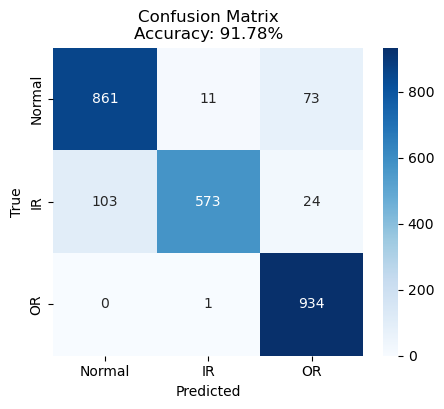

 - Model accuracy: 91.78%


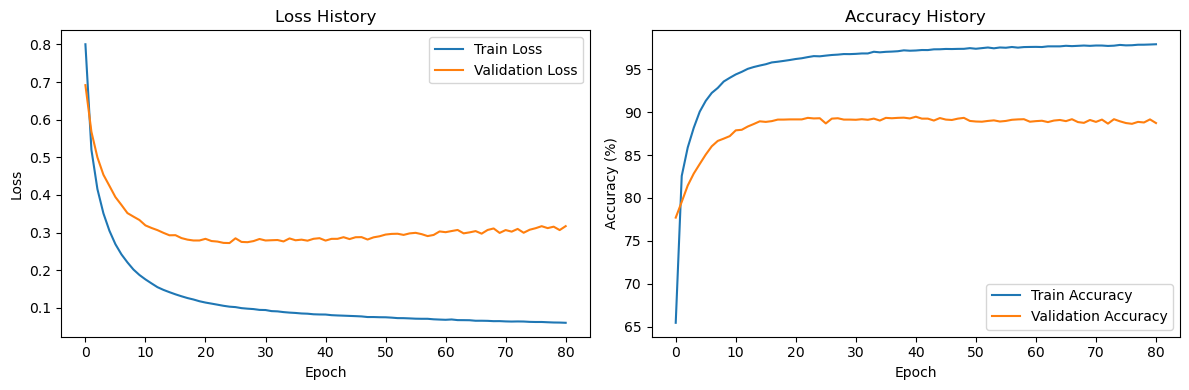

0.95
Early stopping at epoch 100


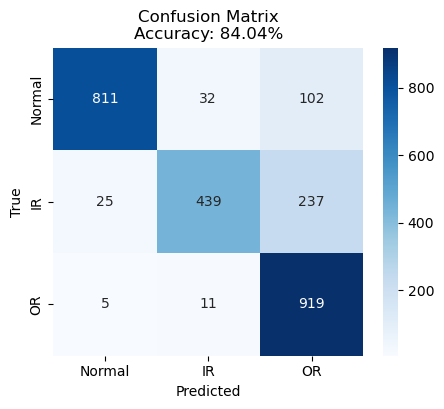

 - Model accuracy: 84.04%


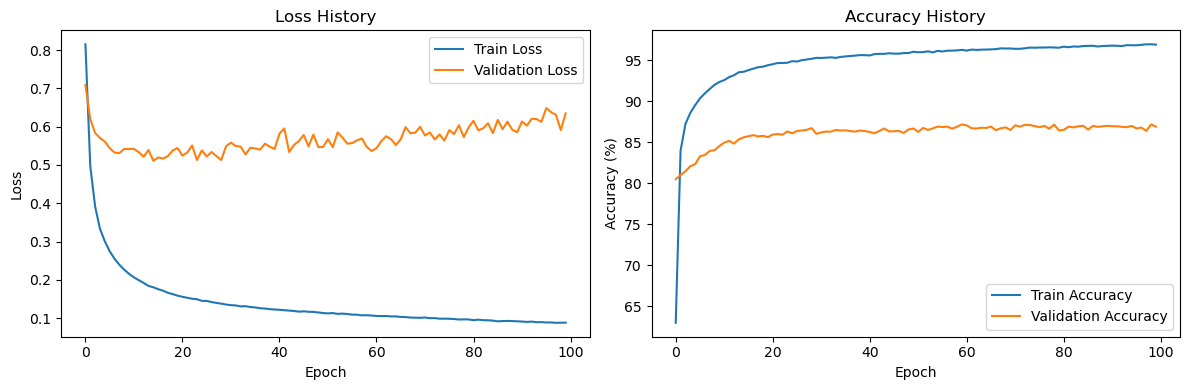

0.95
Early stopping at epoch 187


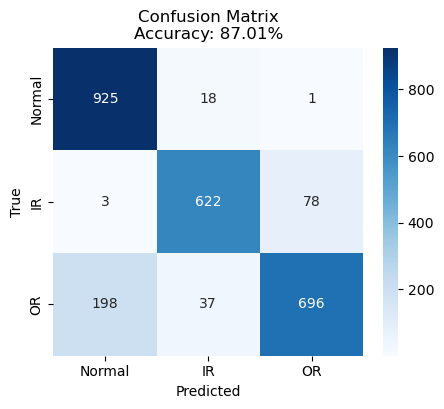

 - Model accuracy: 87.01%


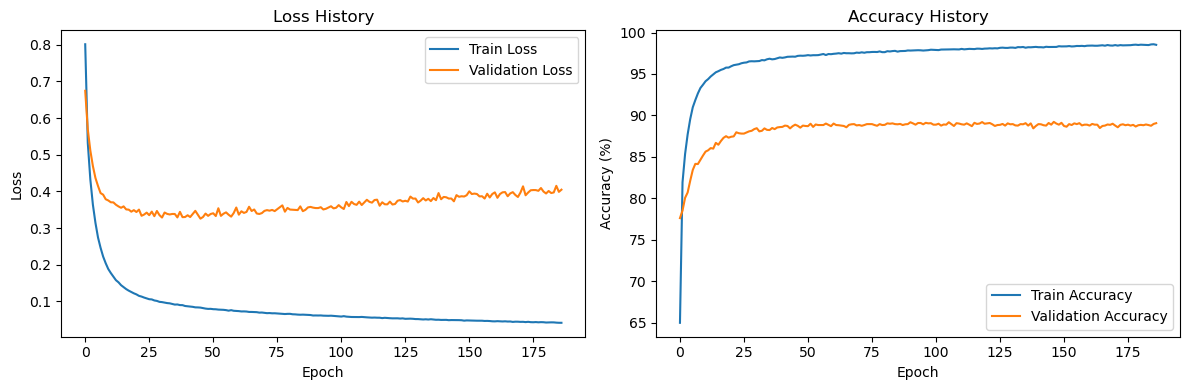

0.95
Early stopping at epoch 143


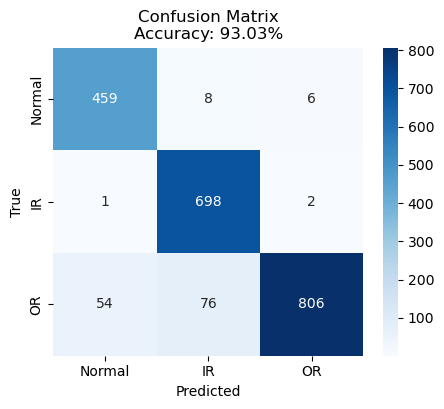

 - Model accuracy: 93.03%


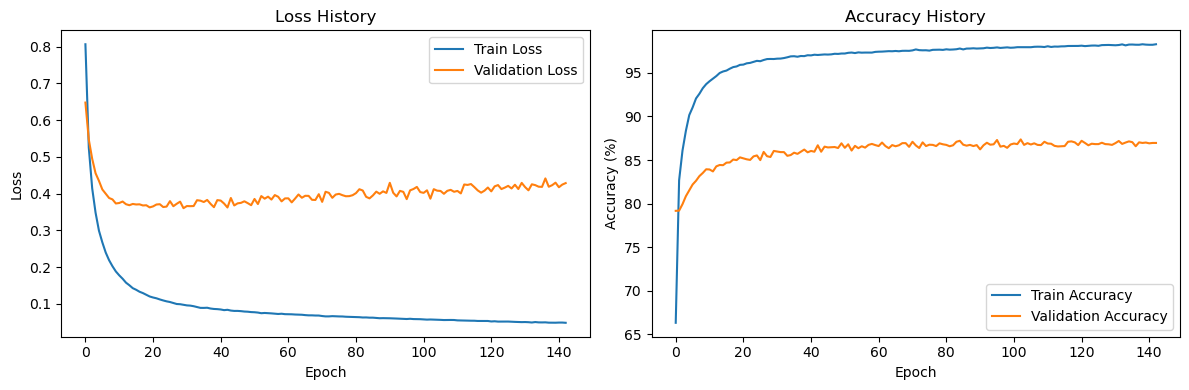

0.95
Early stopping at epoch 115


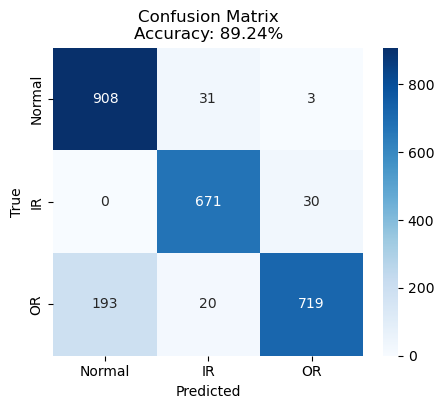

 - Model accuracy: 89.24%


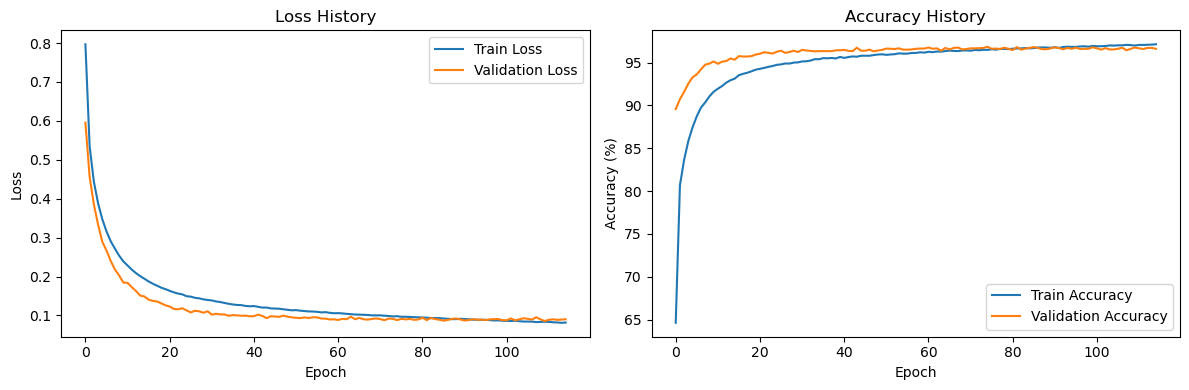

0.95
Early stopping at epoch 118


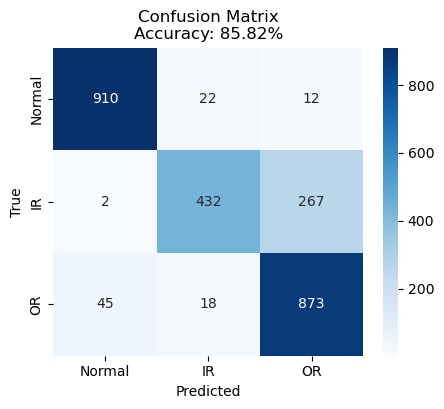

 - Model accuracy: 85.82%


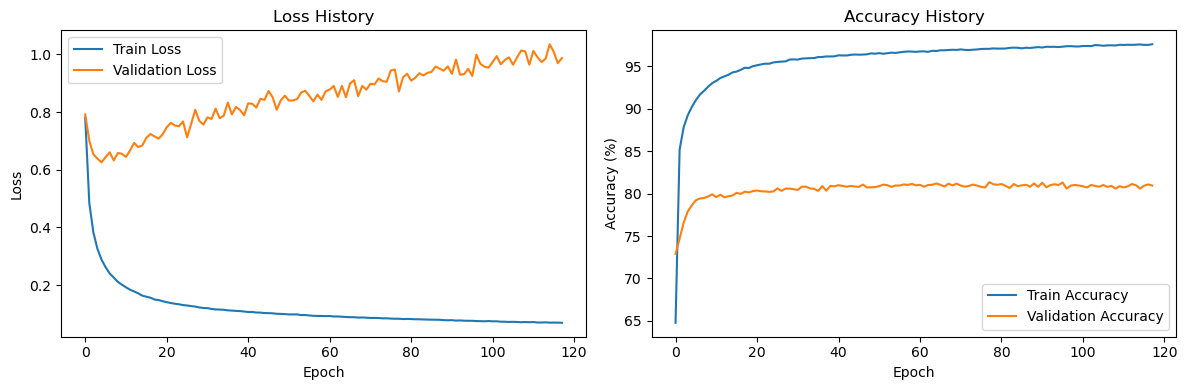

0.95
Early stopping at epoch 178


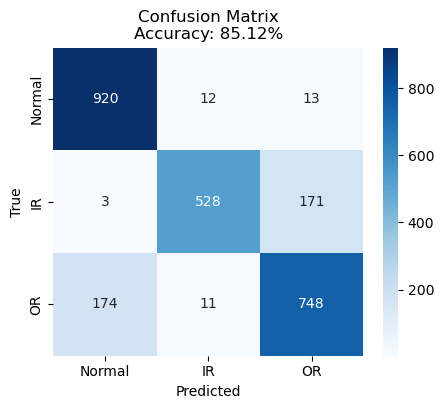

 - Model accuracy: 85.12%


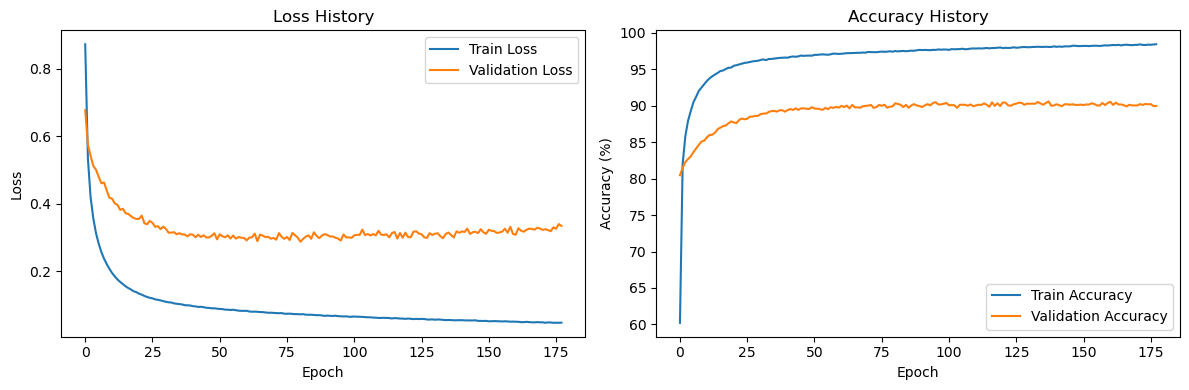

0.95
Early stopping at epoch 184


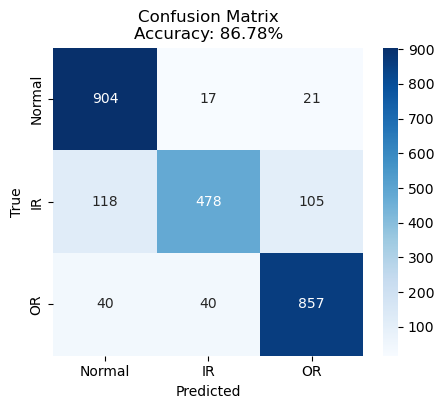

 - Model accuracy: 86.78%


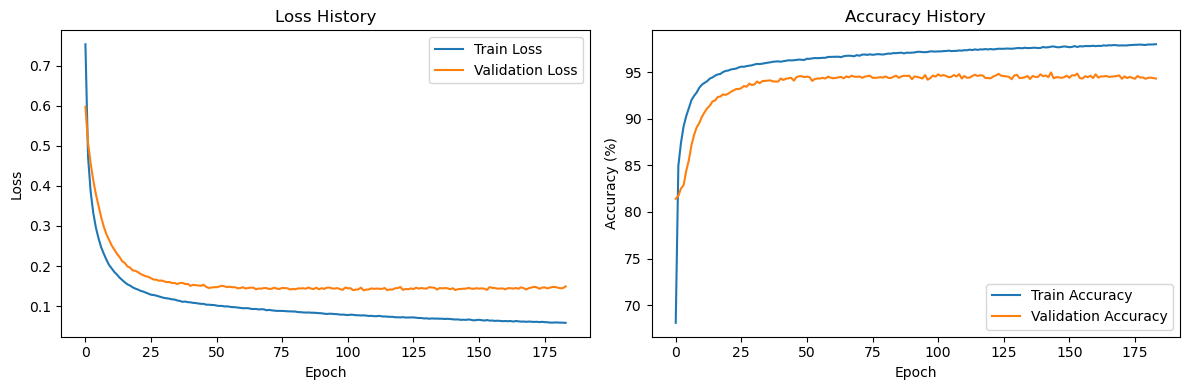

0.95
Early stopping at epoch 127


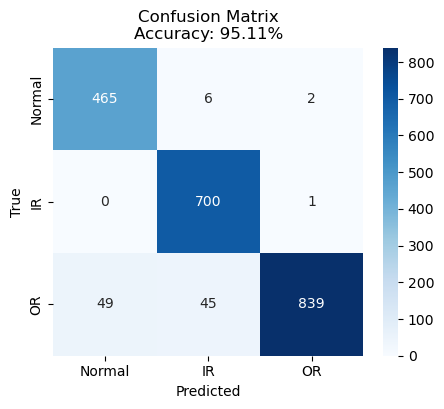

 - Model accuracy: 95.11%


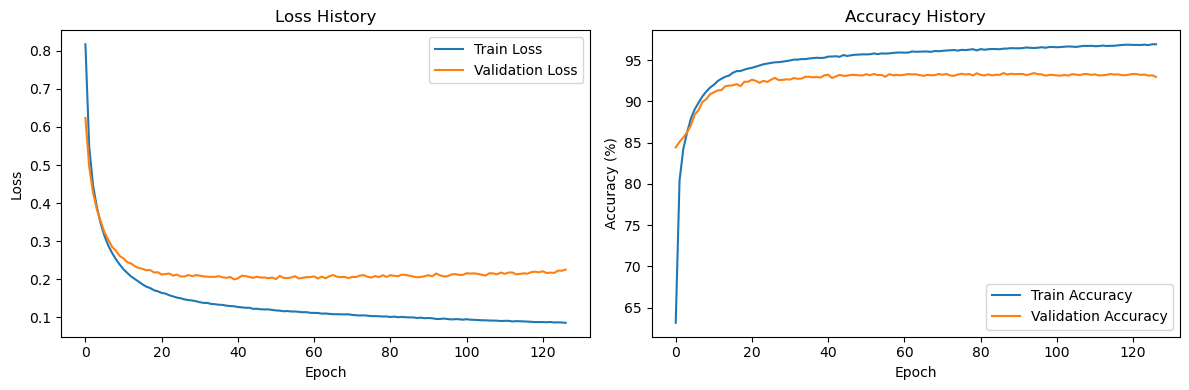

0.95
Early stopping at epoch 95


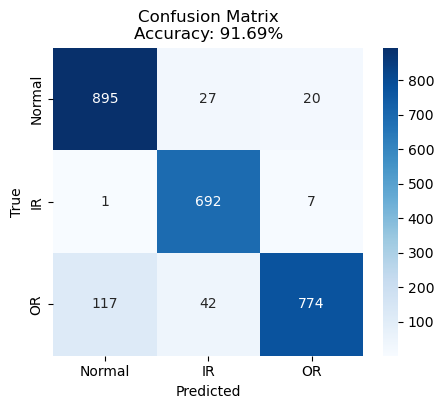

 - Model accuracy: 91.69%


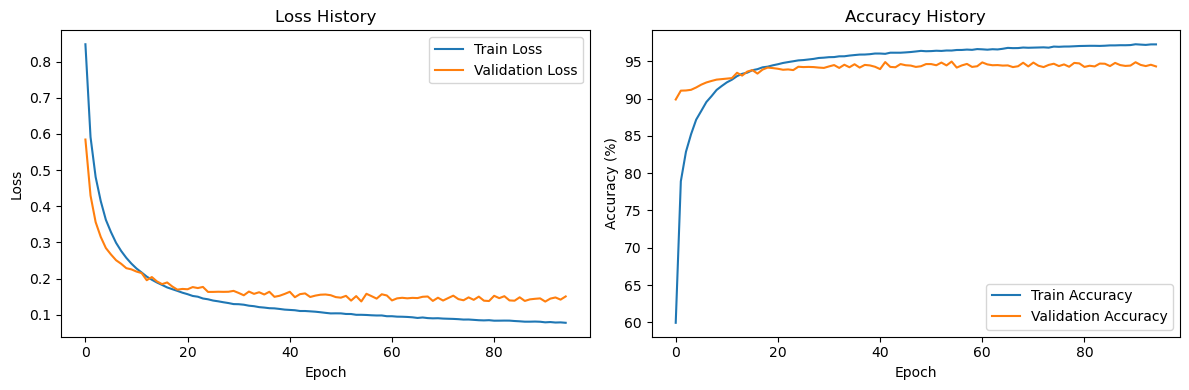

0.95
Early stopping at epoch 131


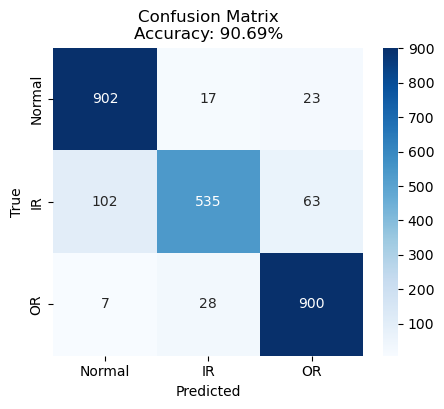

 - Model accuracy: 90.69%


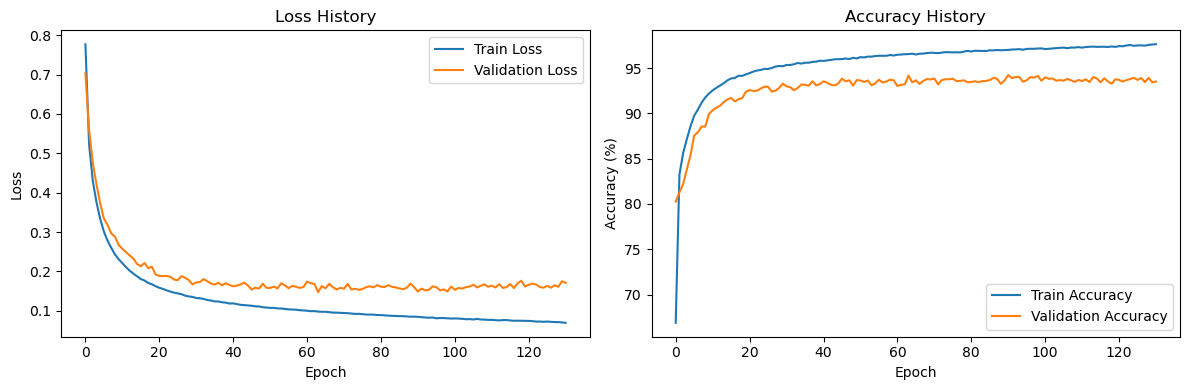

0.95
Early stopping at epoch 124


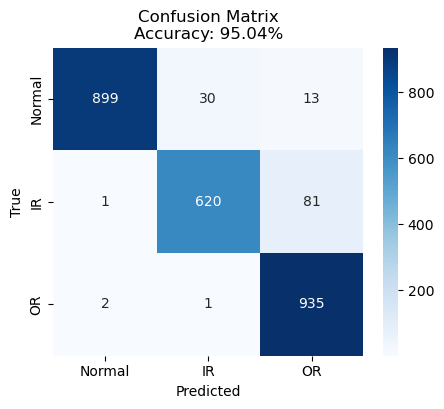

 - Model accuracy: 95.04%


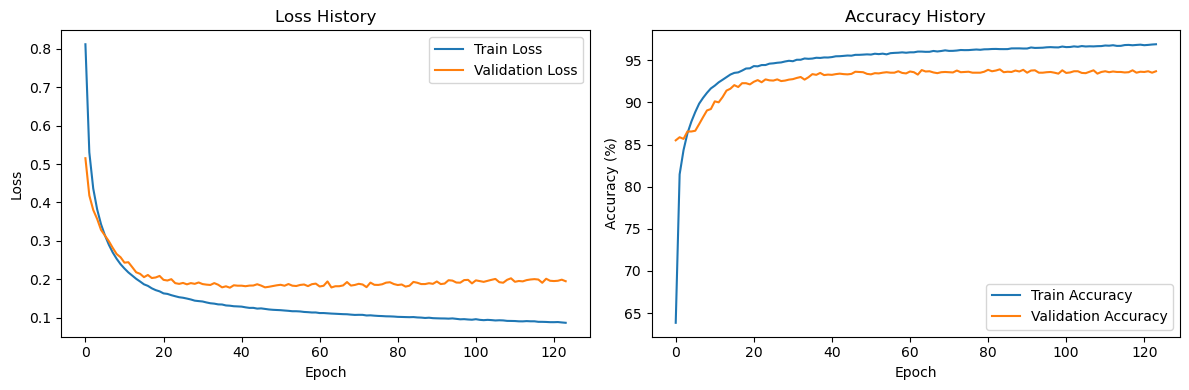

0.95
Early stopping at epoch 184


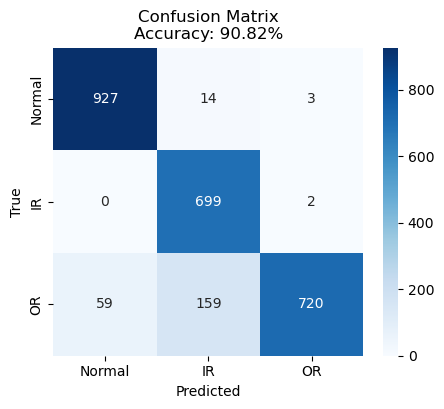

 - Model accuracy: 90.82%


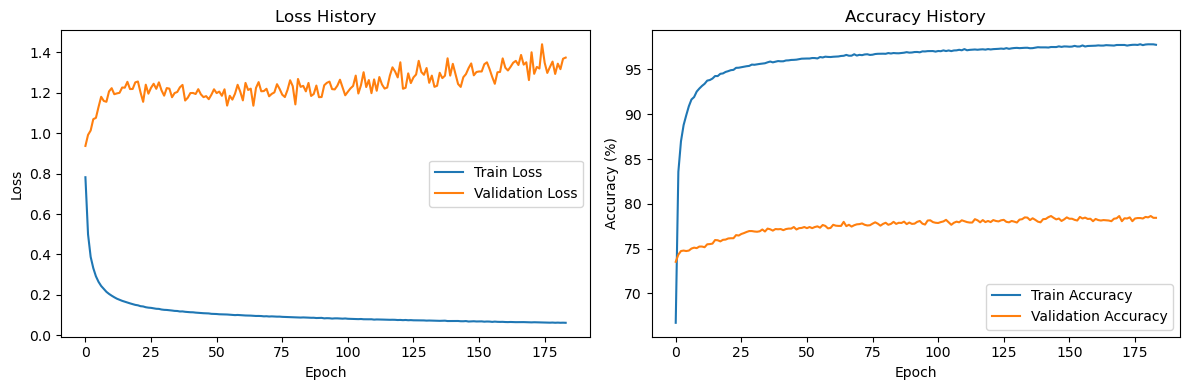

0.95
Early stopping at epoch 102


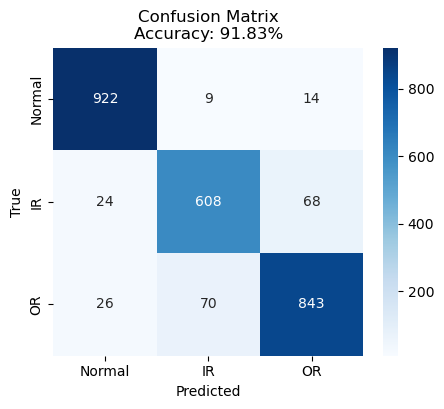

 - Model accuracy: 91.83%


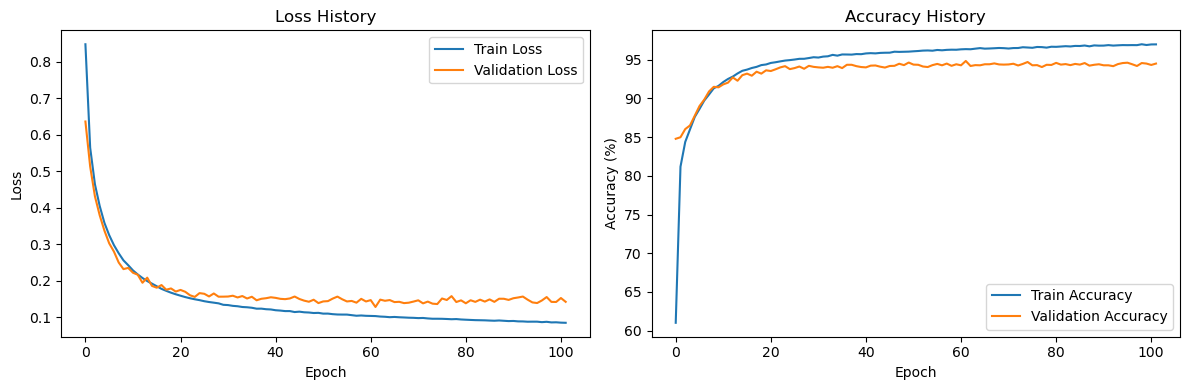

0.95
Early stopping at epoch 93


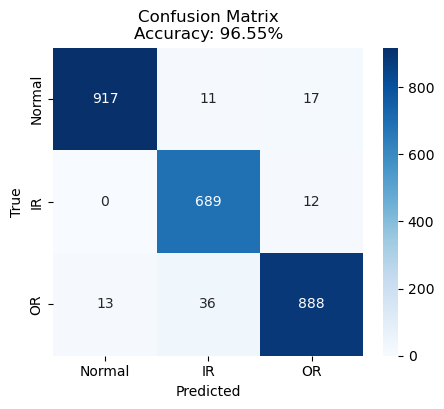

 - Model accuracy: 96.55%


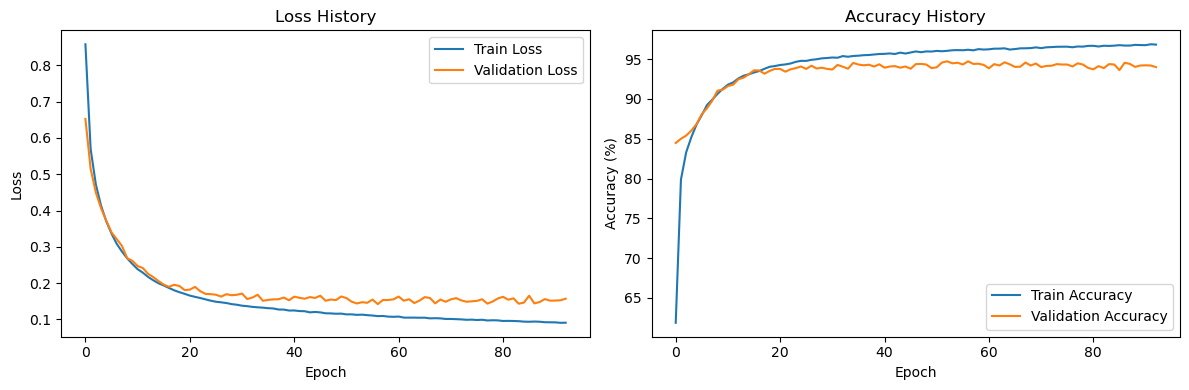

0.95
Early stopping at epoch 108


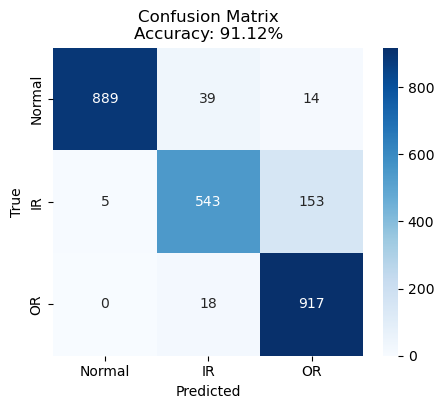

 - Model accuracy: 91.12%


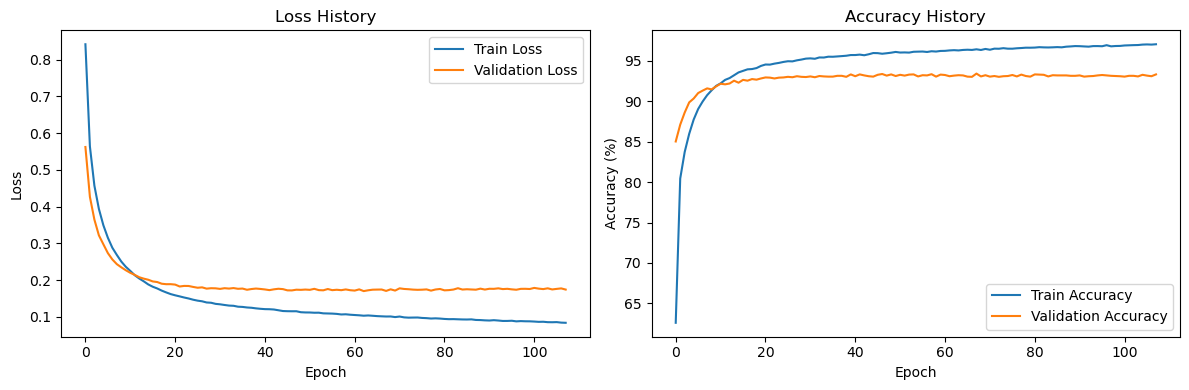

0.95
Early stopping at epoch 139


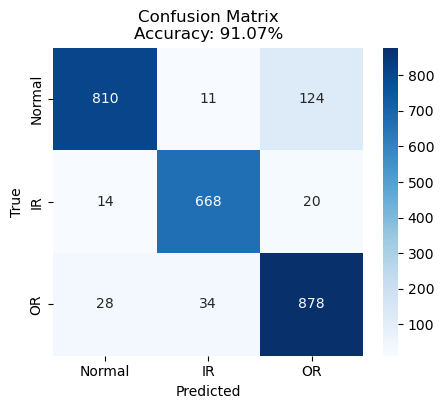

 - Model accuracy: 91.07%


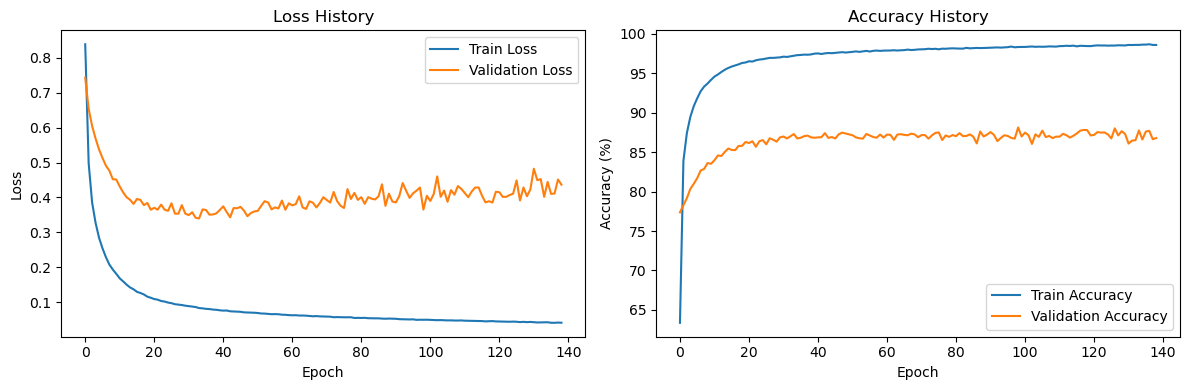

0.95
Early stopping at epoch 128


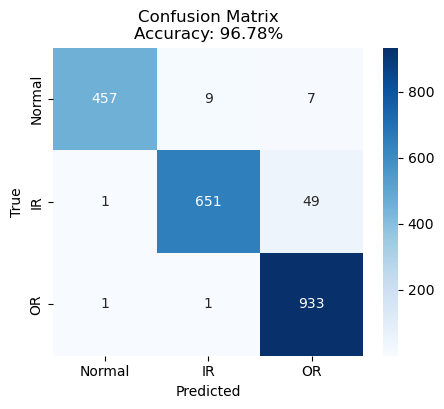

 - Model accuracy: 96.78%


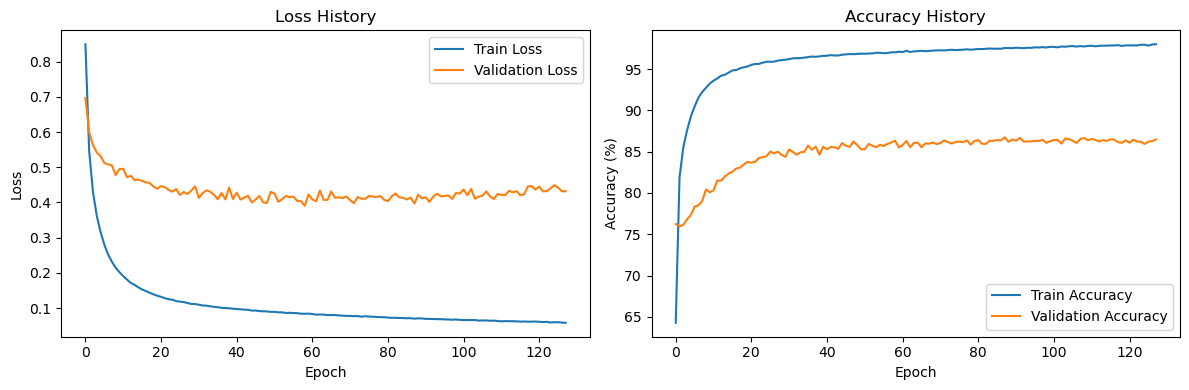

0.95
Early stopping at epoch 104


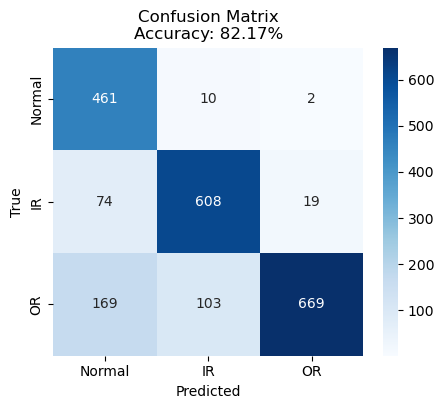

 - Model accuracy: 82.17%


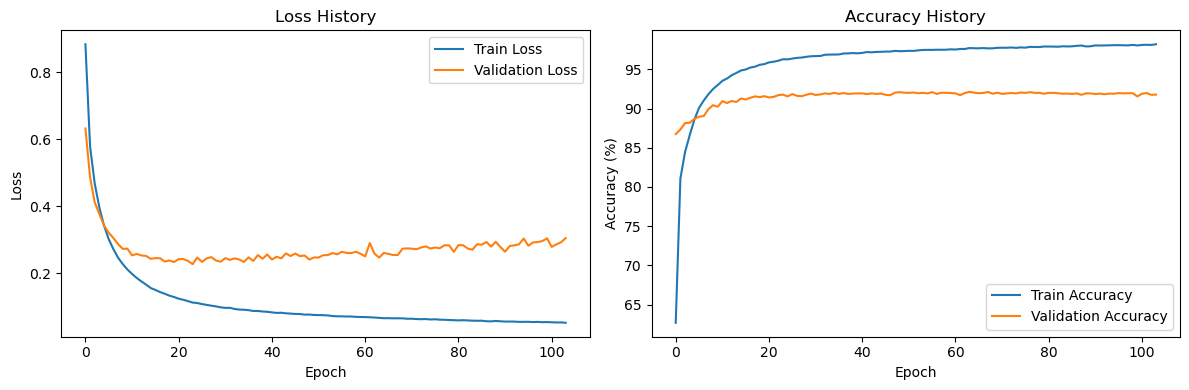

Mean accuracy: 0.9029939863686361
Std accuracy: 0.04130986767286764


In [1]:
import cfg
from src import data_loader as data_loader, models, trainer, evaluate
from torchinfo import summary
import torch.nn as nn
import torch.optim as optim
import numpy as np

accuracy_list = []

for i in range(30):
    trainer.set_seed(i)

    X_train, Y_train, X_val, Y_val, X_test, Y_test, test_files, len_processed = data_loader.data_import(cfg, 500)
    X_train = X_train *1e2
    X_val = X_val *1e2
    X_test = X_test *1e2
    train_loader, val_loader, test_loader = data_loader.create_dataloaders(X_train, Y_train, X_val, Y_val,X_test, Y_test, cfg, len_processed)

    model = models.Deeper1DCNN(1, cfg.NUM_CLASSES)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr= cfg.LEARNING_RATE) #weight_decay=1e-4
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max= cfg.NUM_EPOCHS, eta_min=cfg.LEARNING_RATE *1e-2)

    trained_model, history = trainer.train_model(model, train_loader, val_loader, criterion, optimizer, 'test.pth', scheduler, num_epochs=cfg.NUM_EPOCHS, device=cfg.DEVICE)

    accuracy = evaluate.plot_confusion_matrix(trained_model, test_loader, 'cpu', cfg.CLASS_NAMES)
    accuracy_list.append(accuracy)
    evaluate.plot_history(history)

print('='*20)
print('Mean accuracy:', np.mean(accuracy_list))
print('Std accuracy:', np.std(accuracy_list))